Using different ML models and finding the best-fit to find the price of AUTO

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/auto.csv')
data.head()

symboling  normalized-losses  wheel-base      length      width     height  \
0          5                164   99.800003  176.600006  66.199997  54.299999   
1          5                164   99.400002  176.600006  66.400002  54.299999   
2          4                158  105.800003  192.699997  71.400002  55.700001   
3          4                158  105.800003  192.699997  71.400002  55.900002   
4          5                192  101.199997  176.800003  64.800003  54.299999   

   curb-weight  engine-size  bore  stroke  compression-ratio  horsepower  \
0         2337          109  3.19     3.4               10.0         102   
1         2824          136  3.19     3.4                8.0         115   
2         2844          136  3.19     3.4                8.5         110   
3         3086          131  3.13     3.4                8.3         140   
4         2395          108  3.50     2.8                8.8         101   

   peak-rpm  city-mpg  highway-mpg  target  
0      5500        24           30   13950  
1      5500        18           22   17450  
2      5500        19           25   17710  
3      5500        17           20   23875  
4      5800        23           29   16430

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   wheel-base         159 non-null    float64
 3   length             159 non-null    float64
 4   width              159 non-null    float64
 5   height             159 non-null    float64
 6   curb-weight        159 non-null    int64  
 7   engine-size        159 non-null    int64  
 8   bore               159 non-null    float64
 9   stroke             159 non-null    float64
 10  compression-ratio  159 non-null    float64
 11  horsepower         159 non-null    int64  
 12  peak-rpm           159 non-null    int64  
 13  city-mpg           159 non-null    int64  
 14  highway-mpg        159 non-null    int64  
 15  target             159 non-null    int64  
dtypes: float64(7), int64(9)
me

In [4]:
data.isnull().any()

symboling            False
normalized-losses    False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-size          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
target               False
dtype: bool

In [5]:
data.shape

(159, 16)

In [6]:
data.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  159.000000         159.000000  159.000000  159.000000  159.000000   
mean     3.735849         121.132075   98.264151  172.413837   65.607547   
std      1.193086          35.651285    5.167417   11.523177    1.947883   
min      1.000000          65.000000   86.599998  141.100006   60.299999   
25%      3.000000          94.000000   94.500000  165.650002   64.000000   
50%      4.000000         113.000000   96.900002  172.399994   65.400002   
75%      5.000000         148.000000  100.799999  177.800003   66.500000   
max      6.000000         256.000000  115.599998  202.600006   71.699997   

           height  curb-weight  engine-size        bore      stroke  \
count  159.000000   159.000000   159.000000  159.000000  159.000000   
mean    53.899371  2461.138365   119.226415    3.300126    3.236352   
std      2.268761   481.941321    30.460791    0.267336    0.294888   
min     49.400002  1488.000000    61.000000    2.540000    2.070000   
25%     52.250000  2065.500000    97.000000    3.050000    3.105000   
50%     54.099998  2340.000000   110.000000    3.270000    3.270000   
75%     55.500000  2809.500000   135.000000    3.560000    3.410000   
max     59.799999  4066.000000   258.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         159.000000  159.000000   159.000000  159.000000   159.000000   
mean           10.161132   95.836478  5113.836478   26.522013    32.081761   
std             3.889475   30.718583   465.754864    6.097142     6.459189   
min             7.000000   48.000000  4150.000000   15.000000    18.000000   
25%             8.700000   69.000000  4800.000000   23.000000    28.000000   
50%             9.000000   88.000000  5200.000000   26.000000    32.000000   
75%             9.400000  114.000000  5500.000000   31.000000    37.000000   
max            23.000000  200.000000  6600.000000   49.000000    54.000000   

             target  
count    159.000000  
mean   11445.729560  
std     5877.856195  
min     5118.000000  
25%     7372.000000  
50%     9233.000000  
75%    14719.500000  
max    35056.000000

<Axes: >

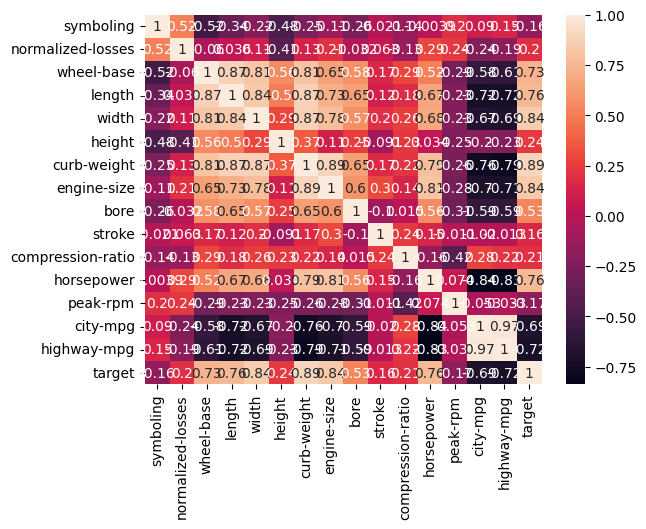

In [7]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

X and Y split

In [8]:
X=data.drop(columns=['target'],axis=1)
X.head()

symboling  normalized-losses  wheel-base      length      width     height  \
0          5                164   99.800003  176.600006  66.199997  54.299999   
1          5                164   99.400002  176.600006  66.400002  54.299999   
2          4                158  105.800003  192.699997  71.400002  55.700001   
3          4                158  105.800003  192.699997  71.400002  55.900002   
4          5                192  101.199997  176.800003  64.800003  54.299999   

   curb-weight  engine-size  bore  stroke  compression-ratio  horsepower  \
0         2337          109  3.19     3.4               10.0         102   
1         2824          136  3.19     3.4                8.0         115   
2         2844          136  3.19     3.4                8.5         110   
3         3086          131  3.13     3.4                8.3         140   
4         2395          108  3.50     2.8                8.8         101   

   peak-rpm  city-mpg  highway-mpg  
0      5500        24           30  
1      5500        18           22  
2      5500        19           25  
3      5500        17           20  
4      5800        23           29

In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled =pd.DataFrame(scale.fit_transform(X),columns = X.columns)
X_scaled.head()

symboling  normalized-losses  wheel-base    length     width    height  \
0   1.062912           1.206222    0.298158  0.364430  0.305112  0.177143   
1   1.062912           1.206222    0.220505  0.364430  0.408114  0.177143   
2   0.222101           1.037394    1.462948  1.766028  2.983114  0.796170   
3   0.222101           1.037394    1.462948  1.766028  2.983114  0.884602   
4   1.062912           1.994089    0.569941  0.381841 -0.415885  0.177143   

   curb-weight  engine-size      bore    stroke  compression-ratio  \
0    -0.258394    -0.336785 -0.413240  0.556703          -0.041559   
1     0.755296     0.552401 -0.413240  0.556703          -0.557392   
2     0.796925     0.552401 -0.413240  0.556703          -0.428433   
3     1.300648     0.387737 -0.638386  0.556703          -0.480017   
4    -0.137667    -0.369717  0.750015 -1.484399          -0.351058   

   horsepower  peak-rpm  city-mpg  highway-mpg  
0    0.201279  0.831733 -0.414945    -0.323313  
1    0.625812  0.831733 -1.402122    -1.565772  
2    0.462530  0.831733 -1.237593    -1.099850  
3    1.442223  0.831733 -1.566652    -1.876386  
4    0.168622  1.477884 -0.579475    -0.478620

In [10]:
Y=data['target']
Y.head()

0    13950
1    17450
2    17710
3    23875
4    16430
Name: target, dtype: int64

Test and train splits

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size =0.2,random_state =0)

Model Building using Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression() #Initialisation
model1.fit(X_train,Y_train)

LinearRegression()

In [17]:
Y_pred=model1.predict(X_test)
Y_pred

array([14028.27663351, 10678.44467465, 13846.89099239, 24691.46646829,
        6073.23973492,  7465.62070728,  5278.27588072, 13617.62016887,
        6313.19620378, 18509.12506835, 12131.57048836, 10762.46210113,
        5223.72816817, 12088.61543241,  5487.57720103,  5127.66868125,
       24147.0698498 ,  8600.81601641,  8444.46348335,  9736.25908982,
        5391.52102824, 10476.46691641,  6637.54649314,  9348.92203261,
        5851.91620636, -2765.69190418,  7782.4183618 , 10241.38603833,
        5141.14420784, 15354.08913282,   946.63983382, 16228.27420059])

In [18]:
Y_pred1=model1.predict(X_train)
Y_pred1

array([ 9102.90671214, 12768.08631753,  6741.41267611, 14001.58412663,
       10067.22422461,  7886.90661764,  6685.66804039, 10524.1362086 ,
        5542.71848467, 18634.83148559,  6323.41222638,  9943.22435943,
       21919.6578654 ,  8086.19339059,  7391.17686957,  8487.10065836,
       14425.01941951, 11509.94798751, 11009.69591543, 18110.59763241,
       21817.63370107, 19707.6168632 , 17997.1228185 , 14432.61853878,
       18793.88081258,  5219.25646785, 15398.10672879,  9892.44236237,
       16364.70374529, 10183.80237926,  5616.4423689 , 16645.66279907,
       13133.278699  ,  8948.89437401,  9007.39669862, 10190.48659418,
        6888.11329258,  7156.87656435,  7094.66644102, 12887.26337852,
        5520.38619611,  7557.93070309, 10649.96527083,  9136.85862825,
        6382.89364687, 27189.80262926,  8447.45616186, 19896.7715735 ,
        7949.38669904,  6014.51942837,  5675.91398473,  6741.41267611,
       17782.34753872,  8223.08785957, 20032.95060247, 21140.07719817,
      

In [19]:
##Comparision

auto_price=pd.DataFrame({'Actual cost':Y_test,'Predicted cost':Y_pred})
auto_price

Actual cost  Predicted cost
7          21105    14028.276634
40         10595    10678.444675
95         18150    13846.890992
45         28248    24691.466468
110         6338     6073.239735
120         8358     7465.620707
59          5499     5278.275881
131        17669    13617.620169
33          5195     6313.196204
83         18150    18509.125068
128         9989    12131.570488
134         9988    10762.462101
60          7099     5223.728168
126         8449    12088.615432
62          6849     5487.577201
37          7395     5127.668681
44         25552    24147.069850
142         7995     8600.816016
85          7957     8444.463483
26          7895     9736.259090
61          6649     5391.521028
54          8499    10476.466916
86          6229     6637.546493
144         8495     9348.922033
63          7349     5851.916206
8           5151    -2765.691904
24          7295     7782.418362
56          8189    10241.386038
119         7738     5141.144208
148        12940    15354.089133
19          6479      946.639834
90         22018    16228.274201

Model Building using Decision Tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()
model2.fit(X_train,Y_train)
Y_pred_2 =model2.predict(X_test)
Y_pred_2

array([20970.,  8845., 18620., 32250.,  6488.,  7198.,  7299., 11549.,
        6095., 16630.,  9639., 10898.,  7799.,  9639.,  7499.,  6695.,
       28176.,  7775.,  7957.,  9095.,  7299.,  6989.,  6229.,  8195.,
        7999.,  6295.,  7129.,  6989.,  6295., 13415.,  7299., 12964.])

In [21]:
res_2 = pd.DataFrame({'Actual Resource Allocated':Y_test,'Predictd Resource Allocation':Y_pred_2})
res_2

Actual Resource Allocated  Predictd Resource Allocation
7                        21105                       20970.0
40                       10595                        8845.0
95                       18150                       18620.0
45                       28248                       32250.0
110                       6338                        6488.0
120                       8358                        7198.0
59                        5499                        7299.0
131                      17669                       11549.0
33                        5195                        6095.0
83                       18150                       16630.0
128                       9989                        9639.0
134                       9988                       10898.0
60                        7099                        7799.0
126                       8449                        9639.0
62                        6849                        7499.0
37                        7395                        6695.0
44                       25552                       28176.0
142                       7995                        7775.0
85                        7957                        7957.0
26                        7895                        9095.0
61                        6649                        7299.0
54                        8499                        6989.0
86                        6229                        6229.0
144                       8495                        8195.0
63                        7349                        7999.0
8                         5151                        6295.0
24                        7295                        7129.0
56                        8189                        6989.0
119                       7738                        6295.0
148                      12940                       13415.0
19                        6479                        7299.0
90                       22018                       12964.0

Model Building using SVM

In [36]:
from sklearn.svm import SVR
model3 = SVR() # Model initialisation
model3.fit(X_train, Y_train)

SVR()

In [23]:
# Predicting on test data
Y_pred_3 = model3.predict(X_test)

In [24]:
# Predicting on training data
Y_pred_3_1 = model3.predict(X_train)

Finding out accuracies of 3 models developed

In [31]:
# Accuracy of Linear Regression Model
from sklearn import metrics
from sklearn.metrics import accuracy_score,mean_squared_error, confusion_matrix ,classification_report
Y_pred_train =model1.predict(X_train)
print("Training accuracy:", metrics.r2_score(Y_train, Y_pred_train))
print("Testing accuracy:", metrics.r2_score(Y_test, Y_pred))

Training accuracy: 0.8560987793726101
Testing accuracy: 0.7627662250250882


In [34]:
# Accuracy of Decision Tree Regressor Model
Y_pred_2_train =model2.predict(X_train)
# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(Y_train, Y_pred_2_train)
mse_test = mean_squared_error(Y_test, Y_pred_2)
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

# Calculate R-squared
r2_train = metrics.r2_score(Y_train, Y_pred_2_train)
r2_test = metrics.r2_score(Y_test, Y_pred_2)
print("Training accuarcy:", r2_train)
print("Testing accuracy:", r2_test)

Training MSE: 19708.22440944882
Testing MSE: 5237190.21875
Training accuarcy: 0.9994083918987944
Testing accuracy: 0.8616293400076188


In [37]:
# Accuracy of SVM model

print("Test accuracy : ", accuracy_score(Y_test,Y_pred_3))
print("Train accuracy : ", accuracy_score(Y_train, Y_pred_3_1))

Test accuracy :  0.0
Train accuracy :  0.33858267716535434


Justification on why we selected Linear regression SVm and Decision Tree Regressor to find the target

1. Support Vector Machine (SVM): Effective for capturing complex decision boundaries and robust to overfitting, suitable for handling both linear and non-linear relationships in predicting automobile prices.
   
2. Decision Tree: Provides easy interpretation, implicitly performs feature selection, and handles both numerical and categorical data well in predicting automobile prices.

3. Linear Regression: Simple yet powerful, offers clear interpretation of feature relationships, computationally efficient, and suitable for capturing linear relationships in predicting automobile prices.

Accuracies of all 3 models

1. Linear Regression

Training accuracy: 0.8560987793726101

Testing accuracy: 0.7627662250250882

2. Decision Tree Regressor

Training accuarcy: 0.9994083918987944

Testing accuracy: 0.8616293400076188

3. SVM Model

Train accuracy :  0.33858267716535434


Interpretation

By comparing all above models, decison tree regressor is the most suitable model to find out the price of auto as the tarining accuracy is 99% and testing accuracy is 86%, which is comparitvely a good performance as only a small dataset of auto prices is given. The second best model is linear regression.


















